# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Loading data

In [2]:
raw_data = pd.read_csv('cruise_ship_info.csv')
df = raw_data.copy()

# 3. Exploratory data analysis (EDA)

In [3]:
# Checking number of variables and number of samples
df.shape

(158, 9)

In [4]:
# Exploring the data types and their values
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [5]:
# Checking columns' names
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [6]:
# separating numerical and categorical features
num_features = ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density']
cat_features = ['Ship_name', 'Cruise_line']
target_var = ['crew']

## 3.1. Explore numerical variables

In [7]:
# summary stats of numerical variables
print(df[num_features + target_var].info())
df[num_features + target_var].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
Age                  158 non-null int64
Tonnage              158 non-null float64
passengers           158 non-null float64
length               158 non-null float64
cabins               158 non-null float64
passenger_density    158 non-null float64
crew                 158 non-null float64
dtypes: float64(6), int64(1)
memory usage: 8.8 KB
None


,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


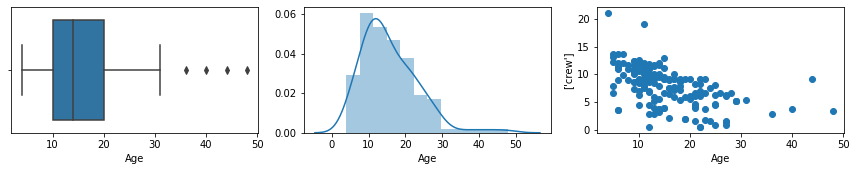

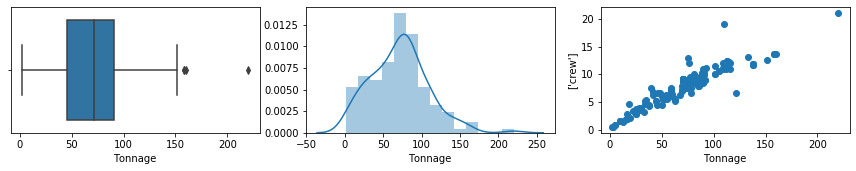

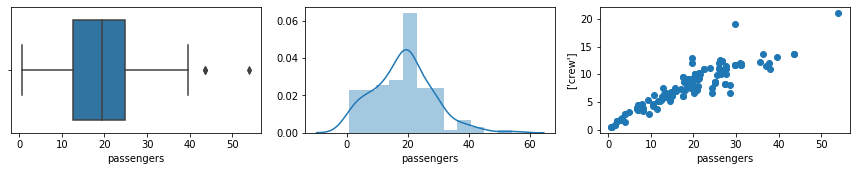

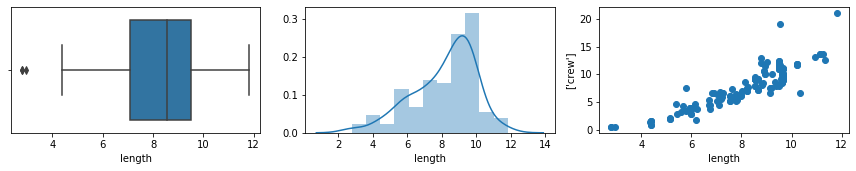

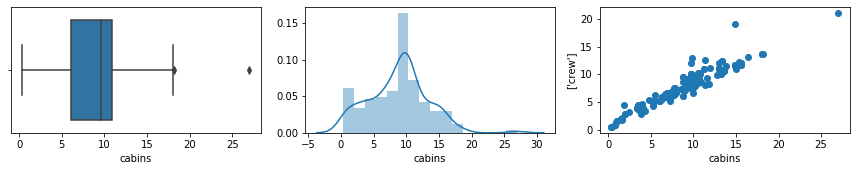

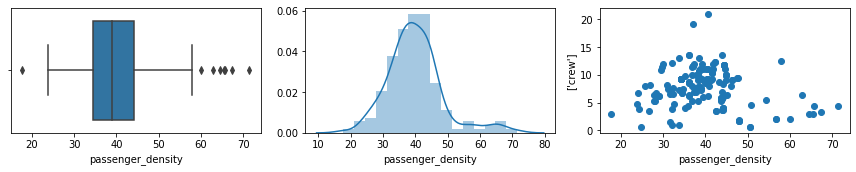

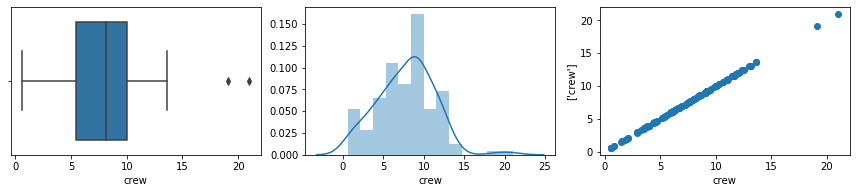

In [8]:
# Visualizing features' distributions
i = 1
for col in (num_features + target_var):
    plt.figure(figsize = (12, 16))
    plt.subplot(7, 3, i)
    sns.boxplot(df[col])
    plt.subplot(7, 3, i+1)
    sns.distplot(df[col])
    plt.subplot(7, 3, i+2)
    plt.scatter(x=df[col], y=df[target_var])
    plt.xlabel(col)
    plt.ylabel(target_var)
    plt.tight_layout()
    i += 3
plt.show()

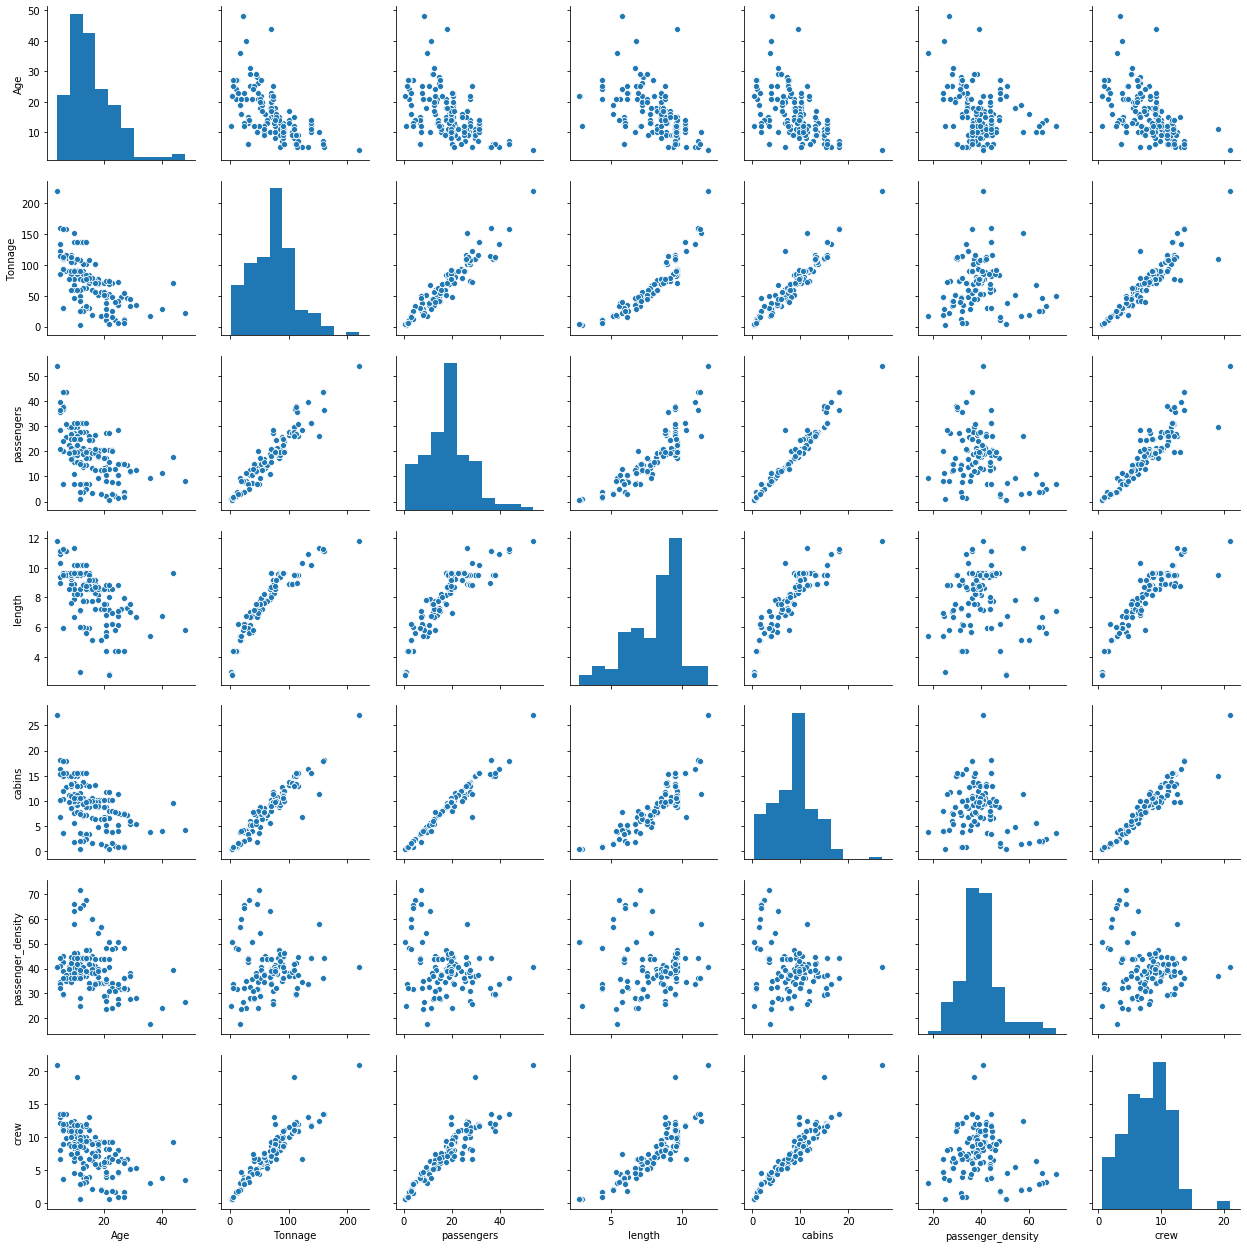

In [9]:
# Visualizing features' correlations
sns.pairplot(df)

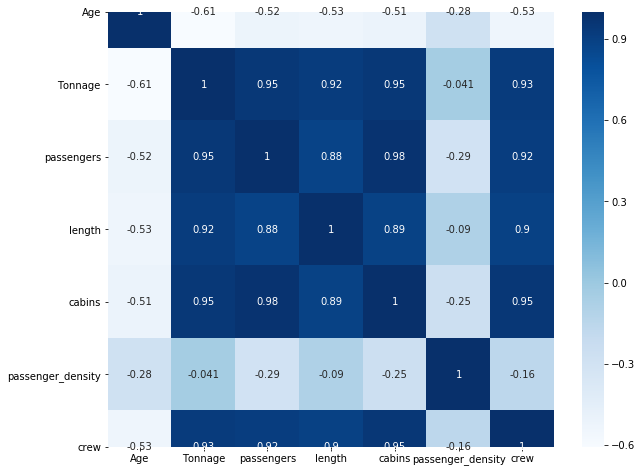

In [10]:
# Calculating correlation coefficients and plotting heatmap 
'''Pearson coefficient shows linear correlation between two variables.
It assumes that the variables are normally distributed and
it only captures the linear relationship between them unlike Spearman correlation'''

pearsoncorr = df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(pearsoncorr, cmap='Blues', annot = True)
plt.show()

## 3.2. Explore categorical variables

In [11]:
# summary stats of categorical variables
print(df[cat_features].info())
df[cat_features].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
Ship_name      158 non-null object
Cruise_line    158 non-null object
dtypes: object(2)
memory usage: 2.6+ KB
None


,Ship_name,Cruise_line
count,158,158
unique,138,20
top,Spirit,Royal_Caribbean
freq,4,23


# 4. Data preprocessing

In [12]:
# Encoding of categorical data and creating dummy variables
df_processed = pd.get_dummies(data=df, columns=['Cruise_line'], drop_first=True)

# 5. Feature selection

In [13]:
# Selecting useful features for building predictive model
removed_features = ['Ship_name', 'Age', 'passenger_density']
droped_vars = removed_features + target_var
selected_features = df_processed.columns.drop(droped_vars)

# 6. Train-test split

In [14]:
# Splitting the dataset to train/test with 60/40 ratio
from sklearn.model_selection import train_test_split
features = df_processed.loc[:, selected_features]
target = df_processed.loc[:, target_var]
feature_train, feature_test, target_train, target_test = train_test_split(features, target, train_size=0.6)

# 7. Model selection

In [15]:
# defining a function for model-validation and model-regularization
def model_valid_reg(model_name, model, param_name, param_range, scoring):
    from sklearn.model_selection import validation_curve
    train_scores, valid_scores = validation_curve(estimator=model,
                                                  X=feature_train, y=target_train.iloc[:, 0],
                                                  param_name=param_name, param_range=param_range,
                                                  scoring=scoring, cv=10)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    train_scores_high_range = train_scores_mean + train_scores_std
    train_scores_low_range = train_scores_mean - train_scores_std
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    valid_scores_high_range = valid_scores_mean + valid_scores_std
    valid_scores_low_range = valid_scores_mean - valid_scores_std
    plt.scatter(param_range, train_scores_mean, c='green', label='training_data')
    plt.fill_between(param_range, train_scores_low_range, train_scores_high_range, color='green', alpha=0.1)
    plt.scatter(param_range, valid_scores_mean, c='red', label='validation_data')
    plt.fill_between(param_range, valid_scores_low_range, valid_scores_high_range, color='red', alpha=0.1)
    plt.legend()
    plt.title(model_name)
    plt.ylim(0.5, 1)
    plt.xlabel(param_name)
    plt.ylabel(scoring)
    plt.show()

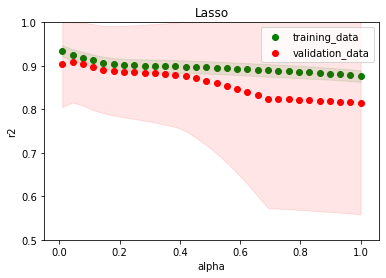

In [16]:
# Lasso model
from sklearn.linear_model import Lasso
model_name = 'Lasso'
model = Lasso(normalize=False)
param_name = 'alpha'
param_range = np.linspace(0.01, 1, 30)
scoring = 'r2'
model_valid_reg(model_name, model, param_name, param_range, scoring)

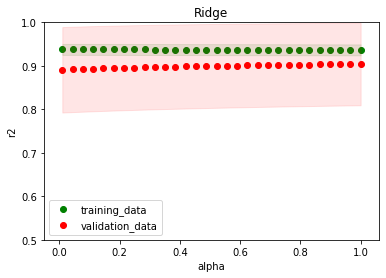

In [17]:
# Ridge model
from sklearn.linear_model import Ridge
model_name = 'Ridge'
model = Ridge(normalize=False)
param_name = 'alpha'
param_range = np.linspace(0.01, 1, 30)
scoring = 'r2'
model_valid_reg(model_name, model, param_name, param_range, scoring)

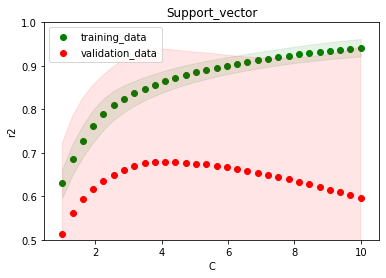

In [18]:
# Support vector model
from sklearn.svm import SVR
model_name = 'Support_vector'
model = SVR(gamma='auto')
param_name = 'C'
param_range = np.linspace(1, 10, 30)
scoring = 'r2'
model_valid_reg(model_name, model, param_name, param_range, scoring)

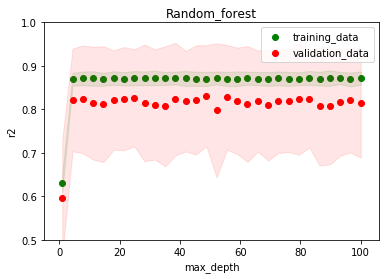

In [19]:
# Random-forest model
from sklearn.ensemble import RandomForestRegressor
'''regularization parameters: ['max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features']'''
model_name = 'Random_forest'
model = RandomForestRegressor(n_estimators=50, min_samples_split=5,
                              min_samples_leaf=5, max_features=15)
param_name = 'max_depth'
param_range = np.linspace(1, 100, 30)
scoring = 'r2'
model_valid_reg(model_name, model, param_name, param_range, scoring)

# 8. Model tuning

## 8.1. Grid search

In [20]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor(criterion='mse')
hyper_parameters = [{'n_estimators': [50, 100],
                     'max_depth': [5, 10, 50],
                     'min_samples_split': [5, 10],
                     'min_samples_leaf': [5, 10],
                     'max_features': [5, 10, 'auto']
                    }]
grid_search = GridSearchCV(estimator=model,
                           param_grid=hyper_parameters,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1, cv=10, iid=False,
                           return_train_score=True, refit=True)
grid_search.fit(X=feature_train, y=target_train.iloc[:,0])
# predictions = grid_search.predict(feature_test)
print(grid_search.best_score_)
grid_search.best_params_

-0.8453928868808414


{'max_depth': 50,
 'max_features': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

## 8.2. Regularization

use the correlation coefficient and  the coefficient of determination R2 (as model's goodness of fit) for model selection

### 8.2.1. Max_depth

Text(0, 0.5, 'RMSE')

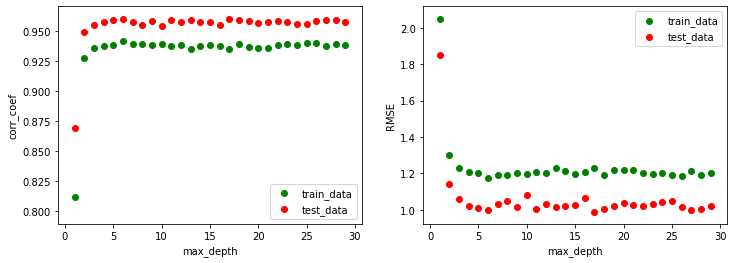

In [21]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
values = range(1, 30, 1)
corr_train = {}
corr_test = {}
RMSE_train = {}
RMSE_test = {}
for i in values:
    model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=i, min_samples_split=5,
                                        min_samples_leaf=5, max_features='auto')
    model.fit(X=feature_train, y=target_train.iloc[:, 0])
    pred_train = model.predict(feature_train)
    pred_test = model.predict(feature_test)
    corr_train[i], _ = pearsonr(target_train.iloc[:, 0], pred_train)
    corr_test[i], _ = pearsonr(target_test.iloc[:, 0], pred_test)
    RMSE_train[i] = np.sqrt(mean_squared_error(y_true=target_train, y_pred=pred_train))
    RMSE_test[i] = np.sqrt(mean_squared_error(y_true=target_test, y_pred=pred_test))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(corr_train.keys(), corr_train.values(), c='green', label='train_data')
plt.scatter(corr_test.keys(), corr_test.values(), c='red', label='test_data')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('corr_coef')
plt.subplot(1, 2, 2)
plt.scatter(RMSE_train.keys(), RMSE_train.values(), c='green', label='train_data')
plt.scatter(RMSE_test.keys(), RMSE_test.values(), c='red', label='test_data')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('RMSE')

### 8.2.2. Max_features

Text(0, 0.5, 'RMSE')

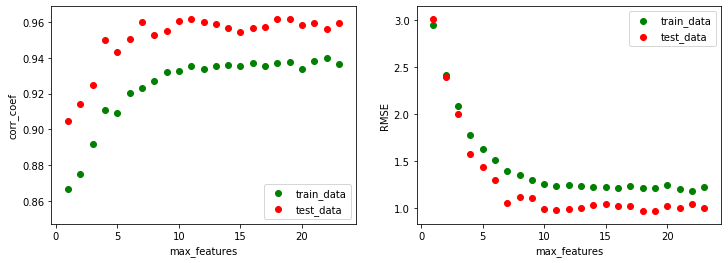

In [22]:
values = range(1, feature_train.shape[1]+1, 1)
corr_train = {}
corr_test = {}
RMSE_train = {}
RMSE_test = {}
for i in values:
    model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=10, min_samples_split=5,
                                        min_samples_leaf=5, max_features=i)
    model.fit(X=feature_train, y=target_train.iloc[:, 0])
    pred_train = model.predict(feature_train)
    pred_test = model.predict(feature_test)
    corr_train[i], _ = pearsonr(target_train.iloc[:, 0], pred_train)
    corr_test[i], _ = pearsonr(target_test.iloc[:, 0], pred_test)
    RMSE_train[i] = np.sqrt(mean_squared_error(y_true=target_train, y_pred=pred_train))
    RMSE_test[i] = np.sqrt(mean_squared_error(y_true=target_test, y_pred=pred_test))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(corr_train.keys(), corr_train.values(), c='green', label='train_data')
plt.scatter(corr_test.keys(), corr_test.values(), c='red', label='test_data')
plt.legend()
plt.xlabel('max_features')
plt.ylabel('corr_coef')
plt.subplot(1, 2, 2)
plt.scatter(RMSE_train.keys(), RMSE_train.values(), c='green', label='train_data')
plt.scatter(RMSE_test.keys(), RMSE_test.values(), c='red', label='test_data')
plt.legend()
plt.xlabel('max_features')
plt.ylabel('RMSE')

# 9. Measure model efficacy

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=10, min_samples_split=5,
                                        min_samples_leaf=5, max_features='auto')
model.fit(X=feature_train, y=target_train.iloc[:, 0])
predictions = model.predict(feature_test)
RMSE = np.sqrt(mean_squared_error(y_true=target_test, y_pred=predictions))
r2 = r2_score(y_true=target_test, y_pred=predictions)

print('RMSE_score:', round(RMSE, 2))
print('\nr2_score:', round(r2, 2))
print('\ntarget_test_mean:', round(target_test.describe().loc['mean','crew'], 2))
print('\ntarget_test_std:', round(target_test.describe().loc['std','crew'], 2))

RMSE_score: 1.05

r2_score: 0.91

target_test_mean: 7.32

target_test_std: 3.52


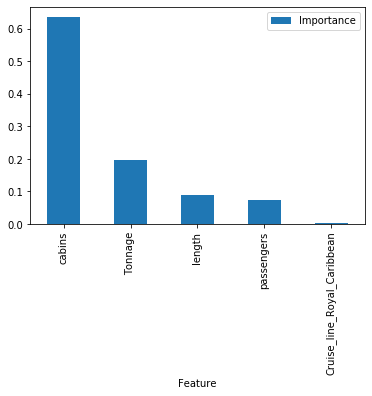

,Importance
Feature,
cabins,0.635871
Tonnage,0.198084
length,0.090268
passengers,0.072923
Cruise_line_Royal_Caribbean,0.002594


In [24]:
features = feature_train.columns
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature':features, 'Importance':importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.set_index('Feature', inplace=True, drop=True)
feature_importances[0:5].plot.bar()
plt.show()
print(feature_importances[:5])